In [32]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

sns.set()
from sklearn.cluster import KMeans
import env
import os

pd.options.display.max_rows = 100 

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

### Load the Data 

In [4]:
data = pd.read_csv('iris_dataset.csv')

In [5]:
#inspect the data 
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


<function matplotlib.pyplot.show(close=None, block=None)>

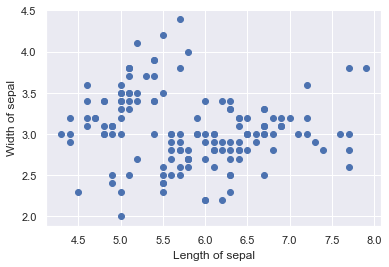

In [6]:
#Create a scatter plot based on two corresponding features 
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show

Takeaway: 
- Distribution appears evenly dispersed 

### Clustering Unscaled Data 

In [7]:
#create a variable which will contain the data 
x = data.copy()
#create a k-means object with 2 clusters 
kmeans = KMeans(2)
#fit the data 
kmeans.fit(x)

KMeans(n_clusters=2)

In [9]:
#create a copy of data, so we can see the clusters next to the original data 
clusters = data.copy()
#predict the cluster for each observation 
clusters['cluster_pred']=kmeans.fit_predict(x)

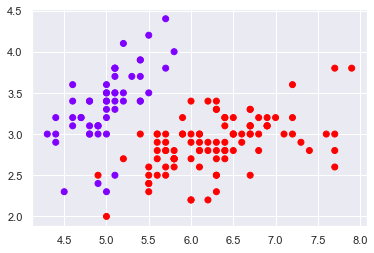

In [10]:
#create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

### Standardize the variables 

In [12]:
#import and use the scale method from sklearn to standardize the data 
from sklearn import preprocessing 

#scale the data for better results 
x_scaled = preprocessing.scale(data)

### Cluster Scaled Data 

In [13]:
# Create a k-means object with 2 clusters 
kmeans_scaled = KMeans(2)
#fit the data 
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [15]:
#create a copy of data, so we can see the clusters next to the original data 
clusters_scaled = data.copy()
#predict the cluster for each observation 
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

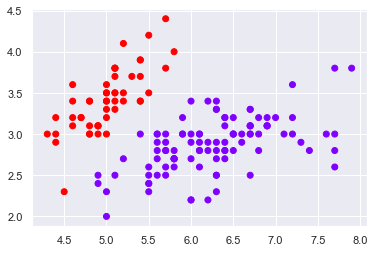

In [16]:
#create a scatter plot based on two corresponding features 
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c=clusters_scaled['cluster_pred'], cmap = 'rainbow')

Takeaway: 
- These two outcomes look similar because the original features have very similar scales to start with 

### Elbow Method 

In [17]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for
# We have it set at 10 right now, but it is completely arbitrary. 
cl_num = 10 
for i in range (1, cl_num): 
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0000000000001,
 223.73200573676348,
 140.96837895511078,
 114.68221609937966,
 91.01130902720142,
 80.19300510158158,
 70.92668674516739,
 63.679779208675086,
 56.29997669506014]

### The Elbow Method 

Text(0, 0.5, 'Within-cluster Sum of Squares')

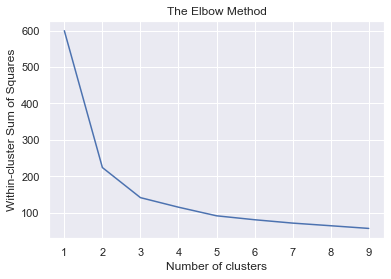

In [18]:
number_clusters = range(1, cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Takeaway: 
- 2 or 3 or 5 clusters appear to be best 

### 2 clusters 

In [19]:
#start by separating the standardized data into 2 clusters 
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(n_clusters=2)

In [21]:
#construct a scatter plot of the original data using the standardized clusters 
#remember that we are plotting the non-standardized values of the sepal length and width 
clusters_2 = x.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_scaled)

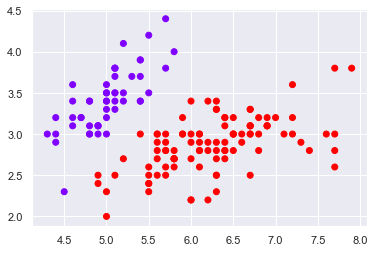

In [22]:
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c= clusters_2 ['cluster_pred'], cmap = 'rainbow')

### 3 clusters 

In [23]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(n_clusters=3)

In [25]:
clusters_3 = x.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)

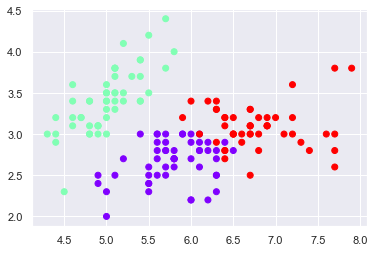

In [26]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

### 5 clusters 

In [24]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(n_clusters=5)

In [27]:
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)

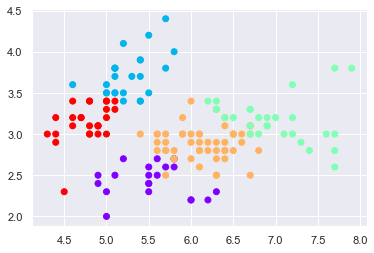

In [28]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow')

Takeaway: 
- The cluster of three is most appropriate given that there are three species of Iris

### Further Summary 
- the elbow method is imperfect (you must use the context of the data within the elbow options to choose the correct number of clusters)
- k-means is very useful in moments where we already know the number of clusters: i.e. iris =3

In [ ]:
#repeat clustering using three features 

- Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

# Load the data 

In [33]:
database_url_base = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/'

In [34]:
def get_mall_customers(use_cache=True):
    if os.path.exists('mall_customers.csv') and use_cache:
        print('Using cached csv')
        return pd.read_csv('mall_customers.csv')
    print('Acquiring data from SQL database')
    query = 'SELECT * FROM customers'
    df = pd.read_sql(query, database_url_base + 'mall_customers')
    df.to_csv('mall_customers.csv', index=False)
    return df

In [35]:
mc_df = get_mall_customers()

Using cached csv


In [36]:
mc_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Plot the data 

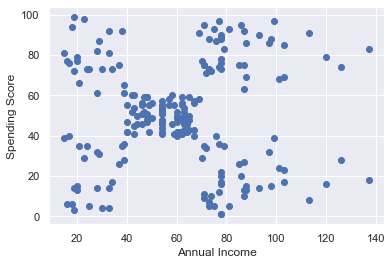

In [37]:
# Create a scatter plot based on two corresponding features 
plt.scatter(mc_df['annual_income'], mc_df['spending_score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Standardize the variables 

In [41]:
mall_data_standardized = mc_df[['age','annual_income','spending_score']]

In [43]:
x_scaled = preprocessing.scale(mall_data_standardized)

In [44]:
#create a copy of data, so we can see the clusters next to the original data 
mall_data_standardized = data.copy()
mall_data_standardized['cluster_pred']=kmeans_scaled.fit_predict()

TypeError: fit_predict() missing 1 required positional argument: 'X'